# Is GDP per capita the best predictor of citizen happiness?

## Introduction - The World Happiness Report from 2015 to 2019

Happiness is not the only goal in life, but for many people, it is the most important one ([Benjamin et al. 2012](https://www.annualreviews.org/content/journals/10.1146/annurev-psych-022423-030818#right-ref-B7)). For example, in a recent survey, thousands of people across nine nations were asked whether they would prefer a happy life, a meaningful life, or a psychologically rich life, filled with novelty and variety ([Oishi et al. 2020](https://www.annualreviews.org/content/journals/10.1146/annurev-psych-022423-030818#right-ref-B73)). In every nation, from India and Angola to the United States and Norway, the majority of people chose a *happy life*. This common quest for a happy life can potentially be guided by scientific studies examining the determinants of happiness - The World Happiness Report is one of them.

This dataset explores global happiness metrics for the years 2015 to 2019 according to The World Happiness Report, providing insights into factors influencing happiness across countries. 

As we'll see soon, key indicators in this report include GDP per Capita, Family Support, Life Expectancy, Freedom (to make life choices), Generosity, and Trust in Government. 

## Context

The World Happiness Report is a landmark survey of the state of global happiness. 

The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. 

The happiness scores and rankings use data from the Gallup World Poll. 

The scores are based on answers to the main life evaluation question asked in the poll. 

This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. 

The scores are from nationally representative samples and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country.

For the purpose of this analysis, I aim to investigate the relationships between these metrics and overall happiness scores, testing this GDP hypothesis and uncovering some correlations and trends. 

---

The first step I want to start with is to load and consolidate the 5 datasets corresponding to the period between 2015 and 2019 into a single dataframe. 

This ensures that we can work with a unified structure across years, making analysis and comparisons consistent and efficient.

Consolidating the data also allows us to standardise column names and handle variations in the dataset formats, enabling streamlined statistical and visual analysis in the next steps.

In [105]:
# Step 1: Load and Consolidate Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.weightstats as st
import pingouin as pg
import math
import plotly.express as px

# Define file paths and corresponding years
file_paths = {
    2015: "/home/jovyan/Everything Counts Assignments/2015.csv",
    2016: "/home/jovyan/Everything Counts Assignments/2016.csv",
    2017: "/home/jovyan/Everything Counts Assignments/2017.csv",
    2018: "/home/jovyan/Everything Counts Assignments/2018.csv",
    2019: "/home/jovyan/Everything Counts Assignments/2019.csv"
}

# Load datasets into a dictionary
dataframes = {}

for year, path in file_paths.items():
    df = pd.read_csv(path)
    dataframes[year] = df

# Standardise column names
rename_mappings = {
    2015: {
        "Economy (GDP per Capita)": "GDP per capita",
        "Health (Life Expectancy)": "Life Expectancy",
        "Trust (Government Corruption)": "Trust in Government",
    },
    2016: {
        "Economy (GDP per Capita)": "GDP per capita",
        "Health (Life Expectancy)": "Life Expectancy",
        "Trust (Government Corruption)": "Trust in Government",
    },
    2017: {
        "Happiness.Rank": "Happiness Rank",
        "Happiness.Score": "Happiness Score",
        "Economy..GDP.per.Capita.": "GDP per capita",
        "Health..Life.Expectancy.": "Life Expectancy",
        "Trust..Government.Corruption.": "Trust in Government",
    },
    2018: {
        "Overall rank": "Happiness Rank",
        "Score": "Happiness Score",
        "Healthy life expectancy": "Life Expectancy",
        "Perceptions of corruption": "Trust in Government",
        "Social support": "Family",
        "Freedom to make life choices": "Freedom"
    },
    2019: {
        "Overall rank": "Happiness Rank",
        "Score": "Happiness Score",
        "Healthy life expectancy": "Life Expectancy",
        "Perceptions of corruption": "Trust in Government",
        "Social support": "Family",
        "Freedom to make life choices": "Freedom"
    }
}

for year, df in dataframes.items():
    df.rename(columns=rename_mappings[year], inplace=True)

# Add a 'Year' column
for year, df in dataframes.items():
    df['Year'] = year

# Combine datasets
combined_df = pd.concat(dataframes.values(), ignore_index=True)

# Display the consolidated dataframe's structure
combined_df.info()

# Preview the first 10 rows to get a Top 10 Happiness Ranking for 2015
combined_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    470 non-null    object 
 1   Region                     315 non-null    object 
 2   Happiness Rank             782 non-null    int64  
 3   Happiness Score            782 non-null    float64
 4   Standard Error             158 non-null    float64
 5   GDP per capita             782 non-null    float64
 6   Family                     782 non-null    float64
 7   Life Expectancy            782 non-null    float64
 8   Freedom                    782 non-null    float64
 9   Trust in Government        781 non-null    float64
 10  Generosity                 782 non-null    float64
 11  Dystopia Residual          315 non-null    float64
 12  Year                       782 non-null    int64  
 13  Lower Confidence Interval  157 non-null    float64

,Country,Region,Happiness Rank,Happiness Score,Standard Error,GDP per capita,Family,Life Expectancy,Freedom,Trust in Government,Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual,Country or region
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015,NaN,NaN,NaN,NaN,NaN,NaN
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015,NaN,NaN,NaN,NaN,NaN,NaN
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015,NaN,NaN,NaN,NaN,NaN,NaN
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015,NaN,NaN,NaN,NaN,NaN,NaN
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015,NaN,NaN,NaN,NaN,NaN,NaN


All datasets have now been standardised to include consistent column names, and a `Year` column has been added for temporal context. 

The merged structure ensures that we have more data to analyse and can even compare metrics across years.

A quick look at the first few rows shows that most key metrics like 'GDP per capita', 'Life Expectancy', and 'Freedom' are well-represented without any significant missing values.

However, to make sure we don't have values of 0 in the dataset affecting future statistics, I'll change any 0 values to NaN before beginning data analysis.

We can also see that there are many columns with irrelevant information such as 'Standard Error' and 'Whisker.high'.

So, before we summarise distributions and trends for key metrics, let's change any 0 values to NaN and drop irrelevant columns.

In [106]:
# Replace values of 0 with NaN in all of the seven key metrics
key_metrics = [
    "Happiness Score", 
    "GDP per capita",
    "Family",
    "Life Expectancy",
    "Freedom", 
    "Trust in Government", 
    "Generosity"
]

combined_df[key_metrics] = combined_df[key_metrics].replace(0, None)

# Select non-key columns by their index number
columns_to_drop = [4, 11, 13, 14, 15, 16, 17, 18]

# Drop and update the dataframe
cleaned_df = combined_df.drop(combined_df.columns[columns_to_drop], axis=1)

# Display the resulting dataframe
cleaned_df.head(10)

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Life Expectancy,Freedom,Trust in Government,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


This consolidated view lays the foundation to track statistical insight, find trends over time and test hypotheses related to the Happiness Score and its contributing factors.

First, just for fun, let's have a look at Global Happiness by Region using an interactive scatter plot:

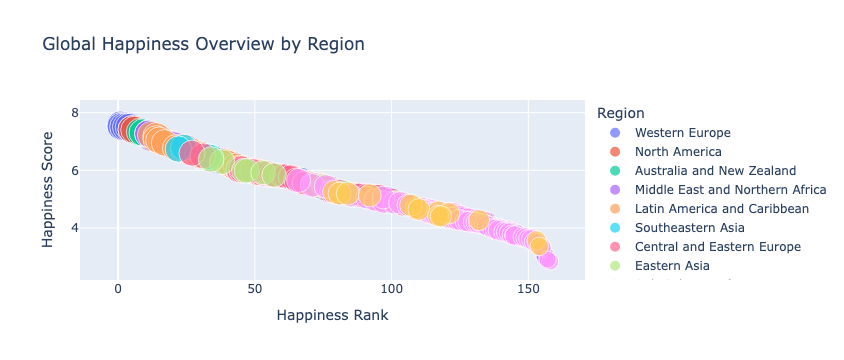

In [107]:
# Interactive scatter plot, doesn't work in PDF format :(
fig = px.scatter(
    cleaned_df, 
    x='Happiness Rank', 
    y='Happiness Score', 
    color='Region',
    hover_name='Country',
    size='Happiness Score',
    title='Global Happiness Overview by Region'
)
fig.show()

As we can see, the higher Happiness Scores aggregate on average in regions like Western Europe, North America, Australia and New Zealand, Latin America and Southeastern Asia, whereas the lowest scores congregate mostly around Southern Asia and Sub-Saharan Africa.

This may signal a foreshadowing of the results of our hypothesis, but let's not get ahead of ourselves.

Perhaps the same scatter plot but comparing Happiness Score and GDP per capita might paint a different picture?


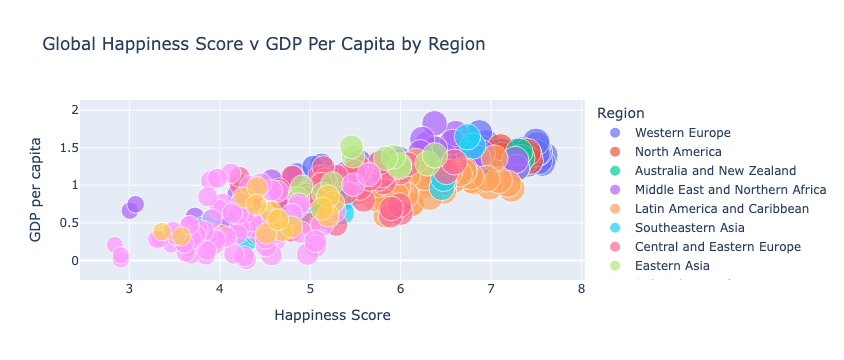

In [108]:
# Interactive scatter plot, doesn't work in PDF format :(
fig = px.scatter(
    cleaned_df, 
    x='Happiness Score', 
    y='GDP per capita', 
    color='Region',
    hover_name='Country',
    size='Happiness Score',
    title='Global Happiness Score v GDP Per Capita by Region'
)
fig.show()

Alas, a similar relationship can be seen, but this time due to a higher variance of values we can see a few outliers from the Middle East and Northern Africa making an appearance in both lower and upper quartiles of the Happiness Score range.

To further understand the relationships between Happiness Score and the other key metrics, we can build a matrix to reveal the strength and direction of relationships between the variables, providing insights into which predictors align most closely with happiness.

Let's have a look at correlations via a heatmap relating the 6 key metrics that contribute to the Happiness Score:

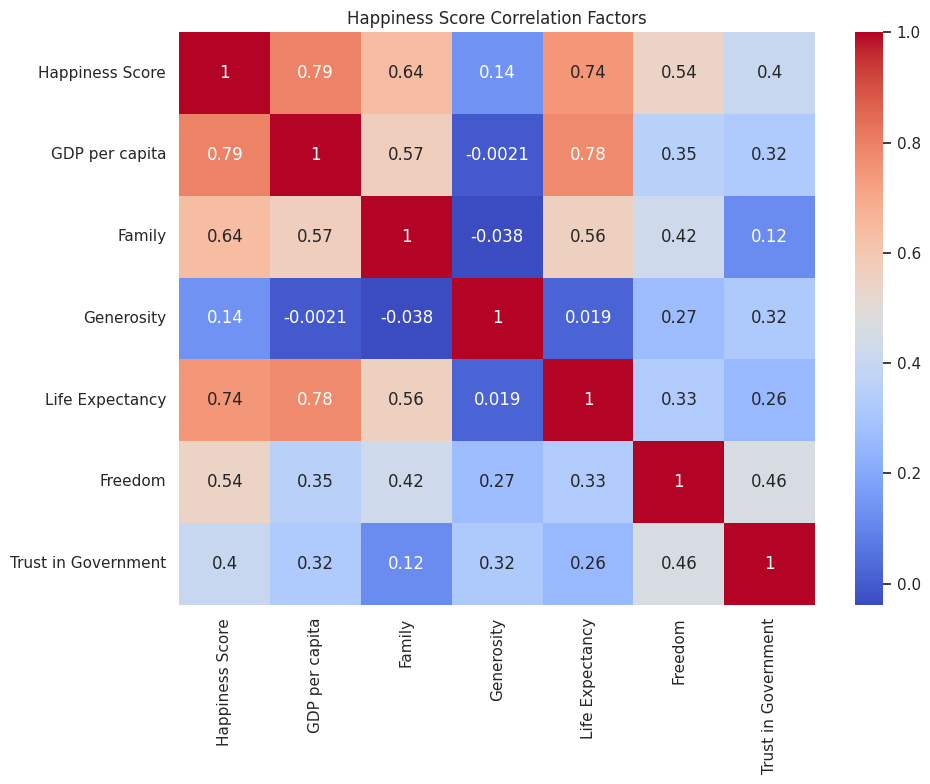

In [109]:
# Correlation heatmap between 6 key metrics
correlation_matrix = cleaned_df[['Happiness Score', 'GDP per capita', 
                         'Family', 'Generosity',
                         'Life Expectancy', 
                         'Freedom', 'Trust in Government']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Happiness Score Correlation Factors')
plt.tight_layout()
plt.show()

The matrix shows that GDP per Capita has the highest correlation with Happiness Score (\(r = 0.79\)), playing a central role in predicting national well-being in this model of happiness. Life Expectancy is the second-highest correlate (\(r = 0.74\)), underscoring the importance of health in every day life. 

Both metrics demonstrate strong, positive relationships with Happiness Score, and with each other.

Family (Social Support) also has a meaningful correlation with Happiness Score at (\(r = 0.64\)), highlighting the critical role of social bonds. Freedom to make life choices correlates moderately with Happiness Score (\(r = 0.54\)), indicating that while economic and health factors dominate, personal freedoms are also significant contributors.

Other metrics, such as Trust in Government (\(r = 0.40\)) and Generosity (\(r = 0.14\)), show weaker but still positive correlations. These results suggest that, while perceptions of corruption and altruistic behaviours contribute to happiness, their impact is less pronounced compared to GDP per capita, health, and social support.

Interestingly, GDP per Capita also exhibits a strong correlation with Life Expectancy (\(r = 0.78\)) and a moderate correlation with Family (\(r = 0.57\)). Generosity, however, shows almost no correlation with GDP (\(r = -0.002\)), indicating that it operates independently of economic factors.

The correlation matrix confirms that economic and health-related metrics dominate as predictors of Happiness Score. 

To further the meaning of these findings, we can couple them with a regression test to see if we can confirm that economic prosperity (GDP per Capita), health (Life Expectancy), and personal freedom are the strongest predictors of national happiness.

In [110]:
#First we convert all columns except 'Country' and 'Region' to numerical values
columns_convert = ['Happiness Rank', 'Happiness Score', 'GDP per capita', 'Family', 'Generosity', 'Life Expectancy', 'Freedom', 'Trust in Government']
cleaned_df[columns_convert] = cleaned_df[columns_convert].apply(pd.to_numeric, errors='coerce')

# Then we drop rows with NaN values so there is no missing data and create a new DataFrame num_df
num_df = cleaned_df.dropna(subset=key_metrics)

import statsmodels.api as sm

# We can now define dependent and independent variables
X = num_df[["GDP per capita", "Life Expectancy", "Freedom", "Trust in Government", "Generosity", "Family"]]
y = num_df["Happiness Score"]

# Then add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# And finally display summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     398.0
Date:                Thu, 02 Jan 2025   Prob (F-statistic):          2.39e-228
Time:                        23:53:30   Log-Likelihood:                -612.28
No. Observations:                 751   AIC:                             1239.
Df Residuals:                     744   BIC:                             1271.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.1252    

The regression analysis reveals that GDP per Capita, Life Expectancy, Freedom, Trust in Government, Generosity, and Family (Social Support) all significantly contribute to the Happiness Score.

This is expected since these are the variables that were pre-selected to explain the self-reporting in happiness in the first place. 

The R-squared value of 0.762 means that the model explains approximately 76.2% of the variability in Happiness Score, indicating a strong fit.

More importantly among these, GDP per Capita emerges as the strongest predictor, explaining a substantial portion of the variability in happiness across countries. 
Although Freedom has the largest per-unit effect with a coefficient of 1.41, GDP per Capita has a slightly smaller coefficient of 1.18 but exerts a greater overall influence due to **total impact**.

The strength of a predictor is determined not just by its coefficient but also by the variability of the predictor across the dataset. GDP per Capita spans a much wider range compared to Freedom, allowing it to have a larger impact. The total impact of a predictor can be calculated using the formula:

\[
\text{Impact} = \text{Coefficient} \times \text{Range of Predictor Values}
\]

For GDP per Capita, the wider range amplifies its overall contribution to the variability in Happiness Score, despite its slightly smaller coefficient. In contrast, Freedom, while impactful on a per-unit basis, has a smaller range in the dataset, which reduces its total explanatory power.

This finding highlights the importance of economic prosperity as a foundational factor for national happiness. 
Health, as measured by Life Expectancy, and Freedom to make life choices also play significant roles. 

To further explore the role of GDP per Capita in predicting happiness, an ANOVA test should be conducted to compare the full regression model with a reduced model that excludes GDP per Capita. 

This test will evaluate whether removing GDP per Capita significantly reduces the explanatory power of the model, or if on the other hand reinforces its influence!


In [111]:
from statsmodels.stats.anova import anova_lm

# Fit models for comparison
model = sm.OLS(y, X).fit()
reduced_model = sm.OLS(y, X.drop(columns=["GDP per capita"])).fit()

# Compare models using ANOVA
anova_results = anova_lm(reduced_model, model)
print(anova_results)

   df_resid         ssr  df_diff    ss_diff           F        Pr(>F)
0     745.0  281.713556      0.0        NaN         NaN           NaN
1     744.0  224.553275      1.0  57.160281  189.386012  1.487440e-38


### Why This Matters

The results from the ANOVA test strongly support the hypothesis that GDP per Capita is a key predictor of citizen happiness. By comparing the reduced model without GDP per Capita to the full model, we can see a significant reduction in the residual sum of squares (SSR). This shows that GDP per Capita accounts for a meaningful portion of the variability in the Happiness Score that cannot be explained by the remaining predictors.

The F-statistic of 189.39 and corresponding p-value show that the improvement in the model when GDP per Capita is included is highly statistically significant. This confirms that GDP per Capita adds meaningful explanatory power and strengthens the model’s ability to predict happiness.

Excluding GDP per Capita would lead to a weaker model, thus reinforcing the importance of considering economic factors when analysing global happiness.

---

### Bias Consideration
While the results validate GDP per Capita’s role as a significant predictor, I need to ensure that its importance isn’t overstated. Economic metrics often correlate with other factors like Life Expectancy or Freedom, which could inflate its perceived contribution due to multicollinearity.

It’s also worth considering how GDP per Capita interacts with other variables. For instance, wealthier countries may naturally have better healthcare systems (affecting Life Expectancy) or higher perceptions of personal freedom. These interactions might make GDP per Capita appear more influential than it is in isolation. By accounting for these potential biases, we can draw more nuanced conclusions about the role of economic prosperity in shaping happiness.


---

### Conclusion - What is Happiness?

This hypothesis testing exercise provides strong evidence for including GDP per Capita in models of happiness. However, to fully understand its role, we must consider the interplay with other predictors beyond the scope of The Happiness Report model and remain mindful of potential biases. 

While GDP per Capita is a significant predictor in this Happiness model, and we can generally say that "average citizen hapiness is positively correlated with GDP per capita", these results alone do not prove that it is the **“best” predictor**. It is the best predictor only within the context of this Happiness Score model, a model that accounts for a very limited number of variables using a very specific self-reporting methodology.

The word ‘happiness’ itself can have diferent meanings for each and every one of us.
Traditionally, happiness has been described as an individual’s satisfaction with their own life, with a balance between positive and negative emotions. We can generally define happiness as the degree to which a person evaluates the overall quality of their own life as a whole. Another possibility is to describe happiness as the degree of the fulfilment of one’s basic needs ([Synek, Petr & Tužil, 2020](https://www.researchgate.net/publication/343255643_How_to_be_happy_analysis_based_on_3438_primary_studies/citation/download)).

Other camps of academic literature tend to prefer the term 'well-being' over 'happiness', and different uses of language hold its own hidden premises and biases.

As a final word, there are inumerable other variables that are not being accounted for in The World Happiness Report, some of which are truly hard to quantify such as the subjective meaningfulness of one's life, the quality and longevity of close relationships - the kinds of subjective factors that should be considered, as our own experience of happiness can attest to.

May all beings be happy!

## FIN